# Pulse Oximeter Development Log

Noter:  
Rad-57 datasheet (lab-0924a.pdf) er meget godt til at lære hvordan det virker, og de måler mere end kun SPO2. Pdf er på computer.  
De bruger DST (Discrete saturation tranform (TM)), så man burde nok lære noget DFT inden da.

-------

## Spørgsmål til møde 2
- [x] De 2 andre studerende har kalibreret setup til 880 til 1100 nm. Skal jeg kalibrere mit eget (660 til 960 nm)?
Svar:  
Finns opstilling 400-800 nm, kan ikke tage filteret fra den, de bestiller måske nyt filter hvorpå jeg kan bruge de 660 nm.  
  
Det hyperspektrale kamera vil give hyperspektral information, altså et spektrum af bølgelængder, dette er mere detaljeret end de to bølgelængder jeg vil bruge (660 & 940 nm). Dog vil en hvidlys kilde og et spektrometer give mere information, så kan man se hvilke spektralkomposanter som er mest vigtige, det er så dem man skal have LED'erne ved. Bruge en glowbar til IR? Til det synlige en halogen pære fra Michael. Man vil lys igennem med en halogen pære, og optisk fiber fra spektrometer på den anden side, så kan man se signal direkte fra (u)iltet hemoglobin.


- [x] Skal jeg bruge phase locking hvis jeg time-multiplexer?  

Svar:
Behøver ikke bruge phase locking, det kræver måske apparat. Man kan godt lave phase locking i python + oscilloskop, tjek en lock-in amplifier

- [x] Skal jeg bruge højpas filter? Mister jeg DC-komponent til ratio of ratios?  

Svar:
Måske notch filter for at undgå 50 Hz støj, dog kan dette filtrere hjertets egen puls væk da det er tæt på hjertets puls. Der kan også være aliasering i form af harmoniske, der fortsætter videre... I første omgang skærmer for lyset. Bruge potentiometre for at finde patientens cutoff frekvens, selvom tolerance er høj.

- [x] Appendix afsnit i rapport  

Svar:
Appendix er bare alt der ikke passer i rapport som censor kan bruge til at forstå ens projekt. f.eks. Datablad, hvilken detektor, lyskilde, billeder, kode, kredsløbsdiagrammer, man skal helst kunne følge flow direkte fra rapporten, men man kan finde detaljer i appendix. Rå data i appendix, hvilken software.

- [x] Andre spørgsmål

Svar:
Isobastisk punkt f.eks. (800 nm), samme absorption for deoxy- og oxyhemoglobin, bruges til at kalibrere volumen af blod. Så kan man f.eks også måle ved 700 nm, ved at sammenligne de to tal, så kan man sige hvor meget blod der er, og hvor stor en del af deoxy- og oxyhemoglobin. Derfor måler man oftest 2-3. De har laser på 793nm og 808nm, eller et isobastisk punkt ved lige under 600nm. Ved at måle med spektrometer eller hyperspektralt kamera, kan jeg finde de mest nøjagtige bølgelængder.  
  
Melanin skal man også tage højde for ift. absorption. Det kan fittes til lineær kurve osv.  
  
Røde bølgelængder vil spredes mere end IR, så det skal også tages højde for.

Kan måske få Zemax licens, hvis det kan bruges, spredningsmodeller af en finger. Ellers gratis Oslo program. Ellers kan jeg lave monte carlo simulation i matlab eller python.
  
Lave filtre kredsløb på proto-/perfboards og have JXT connectors mellem dem.


## Spørgsmål til møde 3


---------

# Risø dag 1 - 20/02/2026
### Hvad skal gøres
- [] Spektrometer data til bølgelængdevalg
1. Opsætning
Sluk lys i lokale.  
Vælg målingstid.  
Bestem lysstyrke fra halogenpære så spektrometer ikke saturerer  
Gem al metadata i tabel

2. Indsaml fire forskellige målinger:    

Kan godt tage flere sweeps per måling.

||Måling 1|Måling 2|Måling 3|Måling 4|
|-|-|-|-|-|
|Mørke $I_{\text{dark}}(\lambda)$|||||  
|Reference 1 $I_0(\lambda)$ uden finger, med tændt lys, helst fiber koblet til detektor|||||
|Reference 2 $I_0(\lambda)$ uden finger, med tændt lys, helst fiber koblet til detektor|||||
|Finger (normal vejrtrækning 1) $I_{\text{normal}}(\lambda)$|||||
|Finger (normal vejrtrækning 2) $I_{\text{normal}}(\lambda)$|||||
|Finger (holder vejret) $I_{\text{hold}}(\lambda)$|||||

- [] Karakteriser LED'er (peak + FWHM) med spektrometer

- [] Korriger med intensitetsstøj fra hver måling
$$
I_0(\lambda)' = I_0(\lambda) - I_{\text{dark}}(\lambda)
$$
$$
I_{\text{normal}} (\lambda)' = I_0(\lambda) - I_{\text{normal}}(\lambda)
$$
$$
I_{\text{hold}}(\lambda)' = I_0(\lambda) - I_{\text{hold}}(\lambda)
$$

3. Udregn absorbans per bølgelængde
$$
 \varepsilon = \frac{\log{\left(\frac{I_{0}}{I} \right)}}{C d \log{\left(10 \right)}}
$$
og derefter:
$$
A = \varepsilon \cdot C \cdot l
$$
Så plot $A$ mod $\lambda$

4. Vælg regioner af interesse på plots
- Rød region hvor der er stor forskel på Rød og IR (660 nm nok)
- IR region hvor der er MODSAT stor forskel på IR og RØD (940 nm nok)
- Isosbestisk region, hvor der er lige stor forskel (800 nm nok)

Udregn SNR? Til hvad?

- [] SPICE simulering af kredsløbs filtre.  

Kør sweep over kredsløb for at identificere karakteristikker for de nuværende filtre, og hvad der ønskes af knækfrekvens, støj etc.

- [] Find eksakte spænd som breakfrekvens kan variere over via. potentiometer.  

Hvis jeg styrer potentiometer for at flytte breakfrekvens, skal jeg styre den modstand som varierer som funktion af positionen fra potentiometeret, små inkrementeringer er ønsket, så tjekke om der er potentiometer på Risø der kan variere "småt".

- [] Afklaringer:

Notch filter er vel ikke slemt? Hjertet slår med 1 Hz, ikke 50-60 Hz? Hvis man antager lavpas filter er stærkt nok, er det måske ikke nødvendigt, men skal tjekkes efter simulering og snak med vejleder.  
    
Tag et kig på hyperspektralt setup, se hvad du kan få af information fra den.

### Hvad blev gjort

### Noter

---------------

 Indkøbsliste:  
  
>Fotodiode:  
- [ ] BPW34 - Vishay
- [x] S1223  
- [ ] FDS100 - Thorlabs
  
>LED/Lasere:  

Man skal bruge LED'er ved 660 og 930-940 nm, ball lens er foretrukket da den har mindre viewing angles, altså mere fokuseret lys.
https://www.thorlabs.com/thorproduct.cfm?partnumber=LED660L  
https://www.thorlabs.com/thorproduct.cfm?partnumber=LED940E  
  
>Op-amps  

# Reading material

### Textbooks 

* Wang & Wu — "Biomedical Optics"
* Tuchin — "Tissue Optics"
* Webster — "Design of Pulse Oximeters"

### Andre

* omlc.org — Steven Jacques' site. Has everything: absorption spectra database, Monte Carlo tutorials, phantom recipes. Gold standard resource.
* MCML software — Wang & Jacques' Monte Carlo code, well-documented, Python wrappers exist

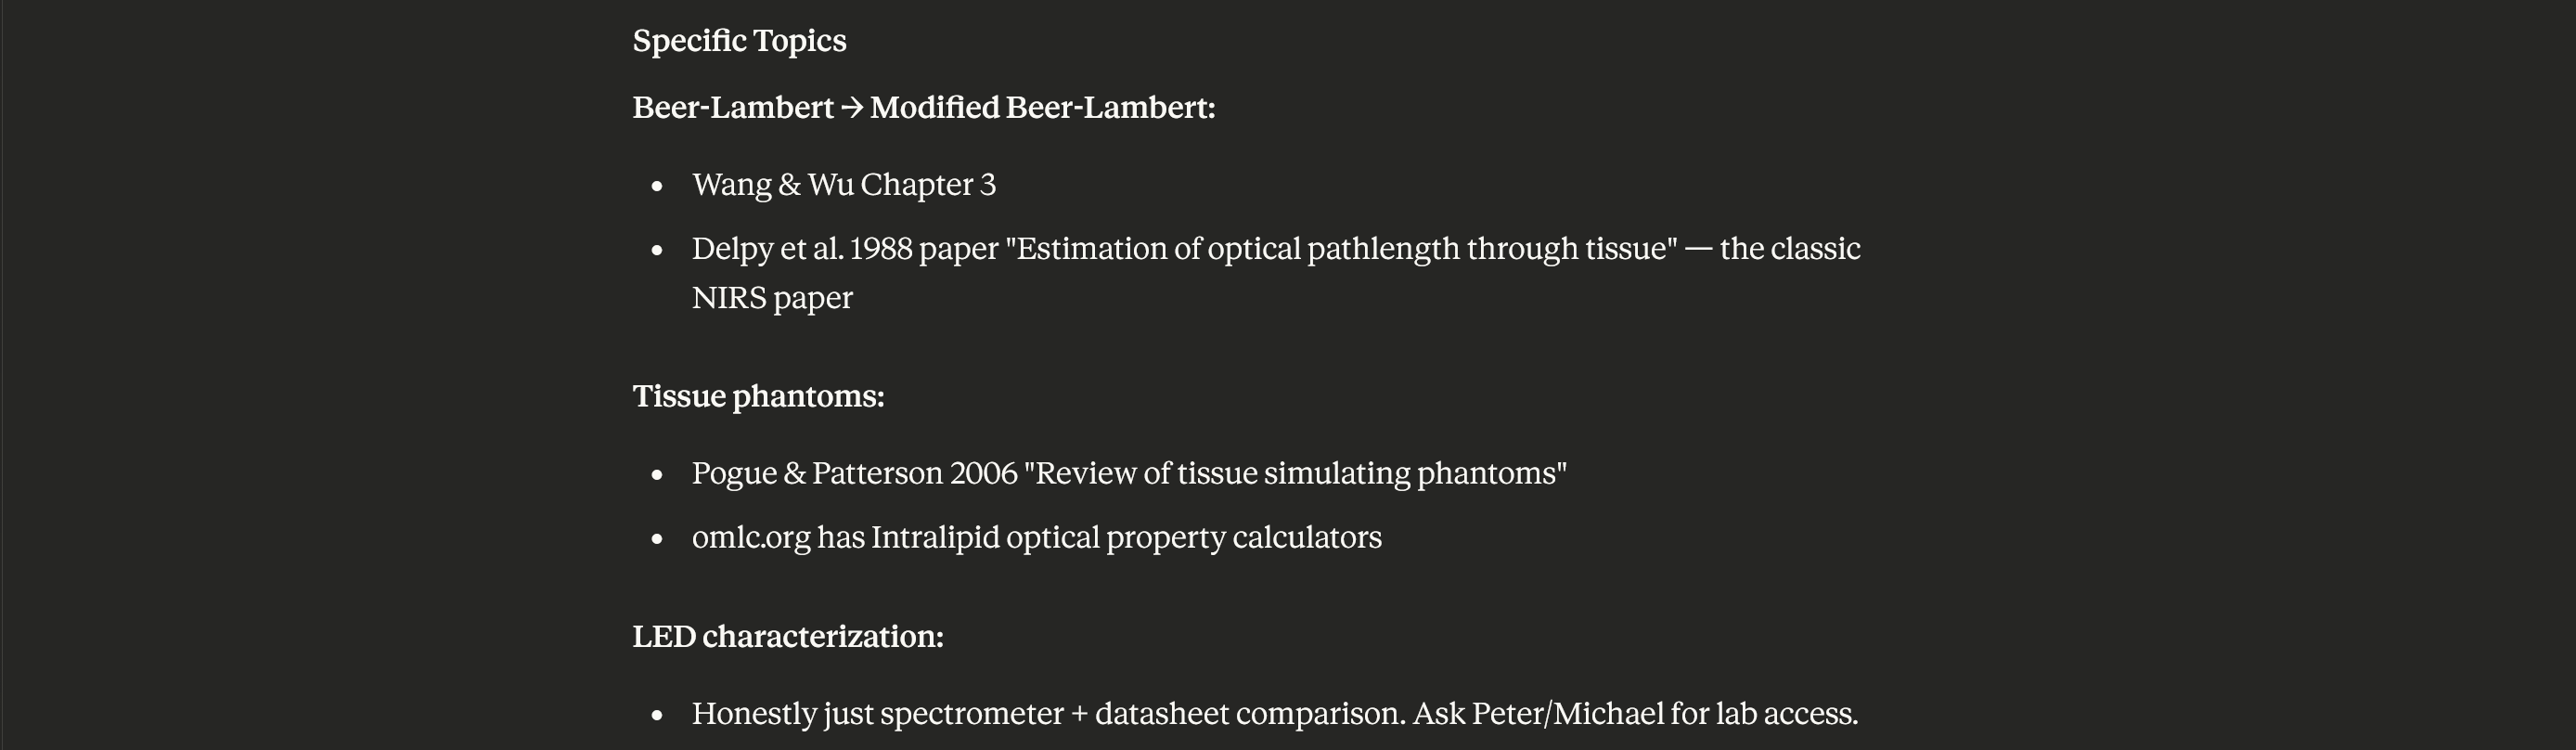

--------------

## Peters anbefaling:


Gemt som "sensors-20-04844-v2.pdf" i mappen 6 semester/Bachelorprojekt. 

* $\text{PaO}_2$: Partial pressure of oxygen in arterial blood

Enhed: mmHg/kPa  
Måles direkte med blodgasanalyse   
Normal: ~80-100 mmHg (11-13 kPa)

- $\text{SaO}_2$: Arterial oxygen saturation    

Denne parameter beskriver hvor godt blodet er respireret og ventileret.  

Enhed: %   
Andel af hæmoglobin bundet til O2 i arterielt blod  
Måles med blodgasanalyse  
Normal: >95%

* $\text{CaO}_2$: Arterial oxygen content (total iltindhold i arterielt blod)  
  
Enhed: $\frac{\text{mL O}_2}{\text{L blod}}$  
  
Formel:
$$
\text{CaO}_2 = 1.36 \cdot [\text{Hb}] \cdot \text{SaO}_2 + 0.0031 \cdot \text{PaO}_2 \tag{mL/L} 
$$
Hvor:
$[\text{Hb}]$ = Koncentration af hemoglobin i blod med enhed $\left (\frac{g}{L} \right )$
-       1.36 mL O2/g Hb = iltbindingskapacitet af 1 gram rent hemoglobin.
-       0.0031 = opløst ilt i arterielt blod plasma (negligibel)  
  
Normal: ~20 mL O2/dL

- $\text{SpO}_2$: Peripheral oxygen saturation  
  
Enhed: %  
Estimat af $\text{SaO}_2$ målt med pulsoximeter (PPG)  
Bruger lysabsorption ved to bølgelængder (~660nm rød, ~940nm infrarød)  
Normal: >95%

* $\text{SvO}_2$: Oxygen saturation in venous blood.        

Denne parameter er relevant, da en forøgelse i vævsmetabolisme eller en formindskning af blod til væv, vil resultere i større ilt ekstrahering af cellerne i det væv, hvilket SÆNKER ilt indholdet i det venøse blod. 

Enhed: %  
Måles i pulmonalarterie (blandet venøst blod)  
Normalt ~ 75%

* $\text{StO}_2$: Oxygen saturation in entire blood in tissue      
  
$\text{StO}_2$ beskrives som forholdet $\frac{\text{Iltet hemoglobin}}{\text{Iltet + uiltet hemoglobin}}$ i både arterielt og venøst blod i det væv.

Enhed: %  
Væv målt med NIRS (Near infrared spectroscopy)  
Bruges til regional perfusion (Redirecte blod til specifikke steder i kroppen)

Koncentrationer af iltmættet hemoglobin $\text{HbO}_2$ og iltfattigt hemoglobin $\text{dHb}$ er parametre der bruges til at bestemme blodets iltmætning.

## Beer-Lambert loven

Disse to ækvivalente Beer-Lambert love antager at ingen spredning foregår, alt lys går lige igennem, absorption er den eneste faktor der sænker intensitet.

#### Fysik version  
$$
I = I_0 \cdot e^{-\mu \cdot d}
$$  
Hvor:  
$I$: Den transmitterede lysintensitet  
$I_0$: Den oprindelige lysintensitet  
$e$: Eulers tal (2.718)  
$\mu = \varepsilon C\ln(10)$: Den lineære absorptionskoefficient, som angiver materialets evne til at svække lyset ($\frac{1}{\text{cm}}$), her kommer den $\varepsilon$ fra kemi versionen.   
$d$: Tykkelsen af materialet eller den afstand, lyset rejser igennem ($\text{cm}$)

#### Kemi version
$$
A = \varepsilon \cdot C \cdot l
$$
Hvor:  
A: Absorbansen (dimensionsløs)  
$\varepsilon$: Molar absorptionskoefficient (kaldes også for "extinctioncoefficient") (se y-akse på figur under), hvor stærkt et stof absorberer lys ved en specifik bølgelængde $\left(\frac{1}{\text{cm}} \cdot \frac{1}{M}\right)$   
$C$: Koncentration (M)  
$l$: Længde af sti (cm)

Forholdet mellem de to versioners absorptionskoefficienter er:
$$
\mu_{\text{absorb}} = \varepsilon \cdot c \cdot \ln(10)
$$
Hvor:  
$c$: Koncentration  
$\ln(10) \approx 2.303$: Konverterer fra $\log_{10}$ (brugt i Beer-Lambert) til naturlig logaritme

Et plot af absorptionskoefficienter som funktion af bølgelængde kan ses under:
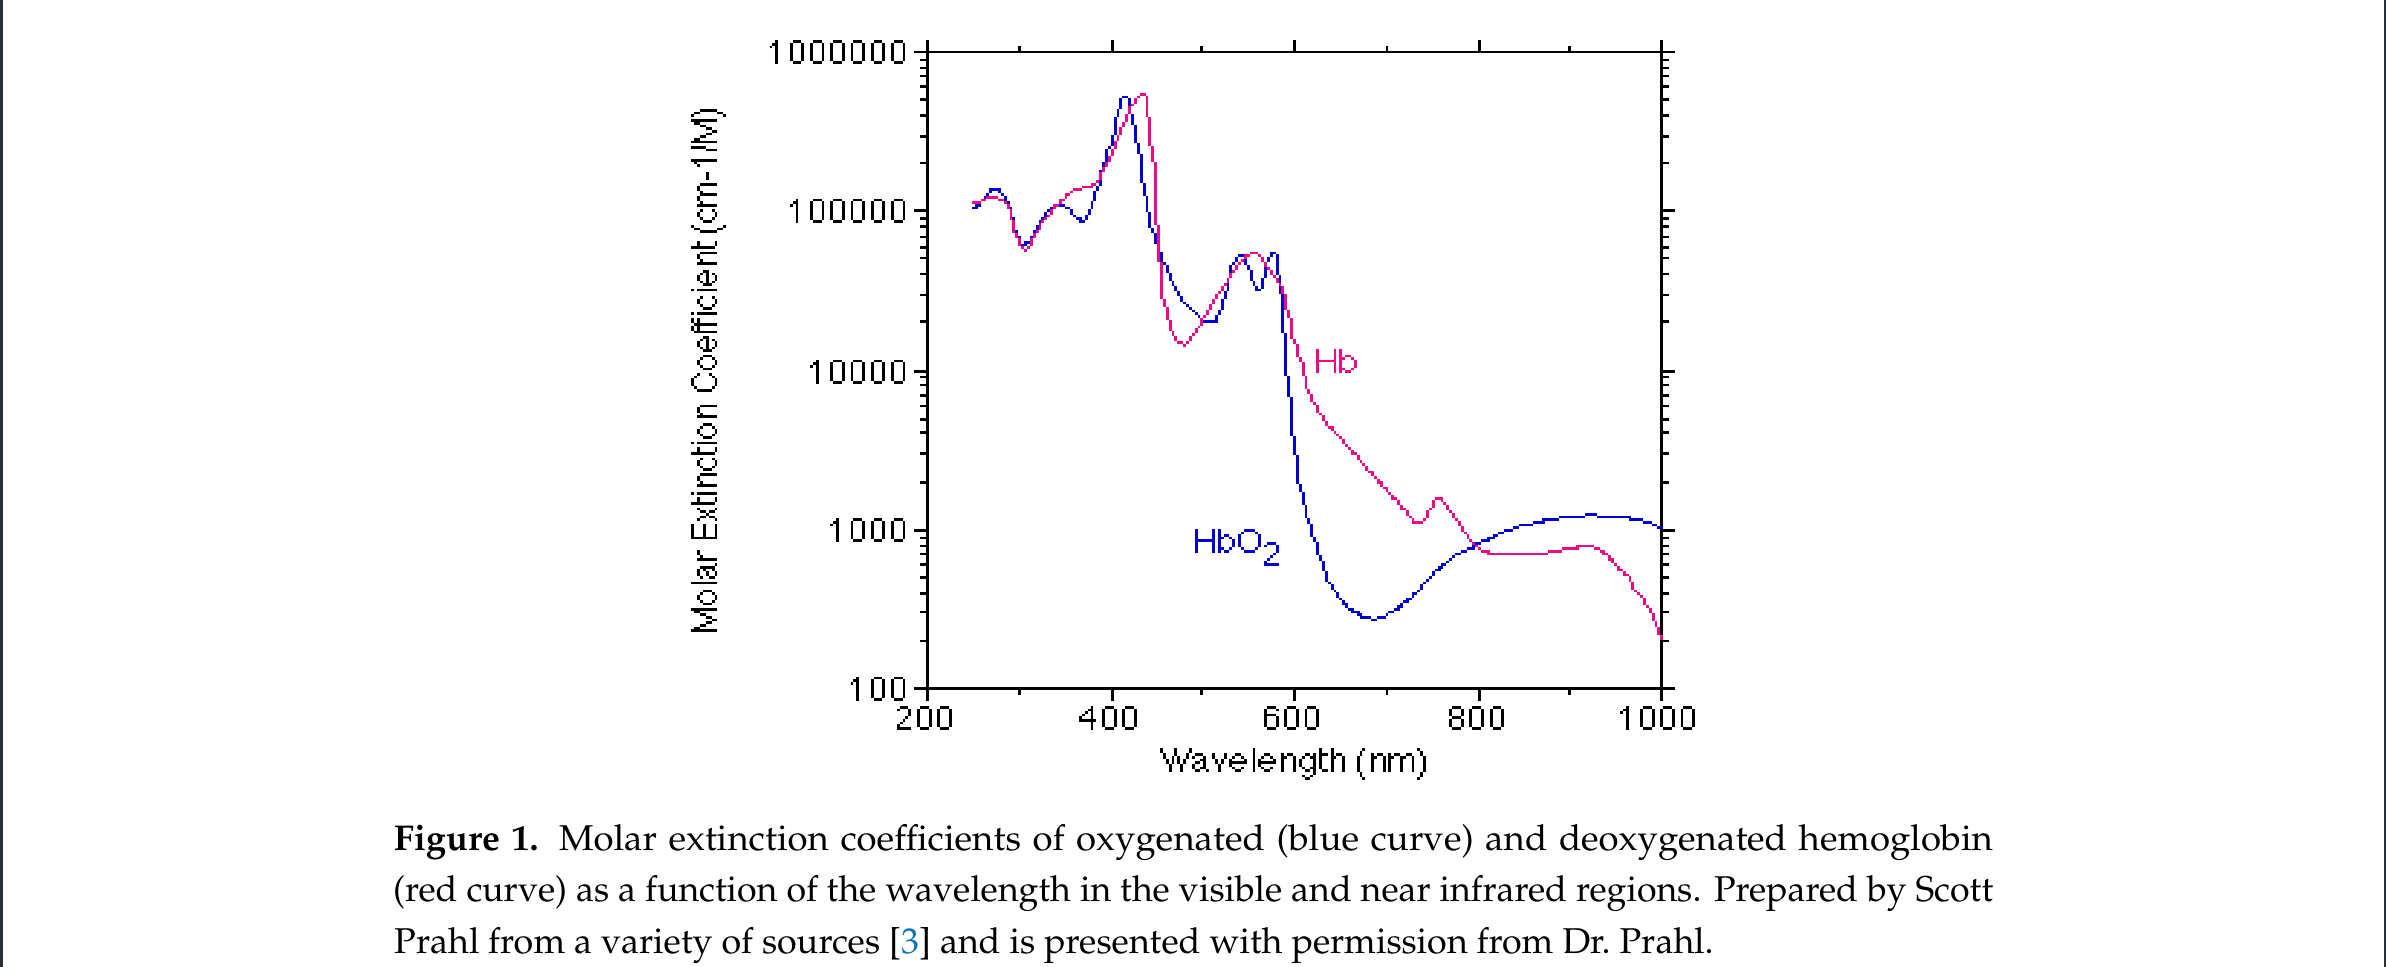

Det kan aflæses at hvor der er stor forskel i absorptionskoefficienter, f.eks. ved 650 og 900 nm, er der hvor man ville nemmest kunne se forskelle i absorption. Den optiske parameter der står for at beskrive tabet af intensiteten af lys igennem væv, kaldes for attenuation. Det er både absorption og spredning der står for denne attenuation.
  
Lys er spredt når det refrakteres mellem to medier med forskellige refraktive index'.  
  
Spredning påvirker attenuation både ved at fotonerne fysisk ikke rammer detektoren, og at fotonerne "bouncer" rundt inde i vævet, og dette forøger rejselængden (se $l$ i Beer-Lambert loven), som påvirker intensiteten.

Problemet med tabet af lysintensiteten er at man ikke kan vide om tabet kan forklares af simpel absorption (vand, melanin, $\text{HbO}_2$, $\text{dHb}$) eller pga. den ekstra rejsetid detektoren skal igennem. Dette er et problem da man kun vil have lysintensiteten til at være afhængig af absorption af hemoglobin.
  
Altså, enten kan tabet af intensitet forklares af ødelæggelse af fotoner (absorption), eller pga. omdirigering af fotoner (spredning). De omdirigerede fotoner har yderligere to årsager som beskrevet før.

#### Total attenuation
Total attenuation beskrives som summen af absorptions-koefficienten og sprednings-koefficienten, begges koefficienter er $\left[\frac{1}{\text{cm}} \right]$:
$$
\mu_{\text{total}} = \mu_{\text{absorb}}  + \mu_{\text{scatter}} 
$$
Absorptions-koefficienten er den man GERNE vil måle på, men man vil minimere spredning.

Spredningskoefficienten er også afhængigt af bølgelængden via relationen:  
$$
\mu_{\text{scatter}}(\lambda) \propto \lambda^{-b}
$$
Hvor b $\approx$ 0.2 op til 1.5 afhængigt af bølgelængden.  
  
Dette fører direkte til at de kortere bølgelængder (blå, grøn) spreder mere end de længere bølgelængder (rød, NIR) som spreder mindre.

Set før i grafen, er absorptionskoefficienten meget mere indflydelsesrig end spredningskoefficienten som funktion af bølgelængden, VED NOGLE BØLGELÆNGDER. Hvis man kigger på tidligere graf, i NIR vinduet, dominerer spredningskoefficienten over absorptionskoefficienten.  
  
I NIR vinduet, da absorptionskoefficienten er lav, vil NIR lys penetrere længere ind i væv end alle andre bølgelængder.

Den totale attenuation beskrevet som summen af de to koefficienter, bruger antagelsen at alle spredninger er <span style='font-family:Comic Sans MS; color:red'>isotropiske</span>, altså at fotoner bevæger sig i komplet tilfældige retninger. I virkeligheden udviser biologisk væv <span style='font-family:Comic Sans MS; color:red'>anisotropisk</span> spredning, hvilket betyder at spredningen af fotoner foregår i nogenlunde samme retning som fotonens incidens. Denne nye model, korrigerer ved at inkludere den anisotropiske spredning.

#### Korrigeret attenuation model  
$$
\mu'_{\text{eff}} = \mu_{\text{absorb}} + \mu_{\text{scatter}}'
$$
Hvor:  
$\mu'_{\text{scatter}} = \mu_{\text{scatter}}(1-g)$  
  
$g$ er anisotropi faktoren, defineret som:
$$
g = \text{mean}(\cos \theta) = \text{Gennemsnitlige cos af spredningsvinkel}
$$
En række forskellige værdier af g er beskrevet her:
* $g = 0$: Isotropisk spredning
* $g = 1$: Foton spredes forud i samme retning som incidens ($\theta = 0$)
* $g = -1$: Foton spredes bagud i modsatte retning som incidens ($\theta = 0$)
* $g \approx 0.7 \ \text{til} \ 0.95$: Beskriver væv korrekt, mest fremad spredning ($\theta < 30$)

Man kan se jo større g-værdi (f.eks. $\theta = 90 \degree$), jo mindre scattering påvirker attenuering.

#### Foton stier
Den distance der tager for en foton at opleve et "event" kan nemt karakteriseres som $\frac{1}{\mu}$

Den længde det tager for en foton at sprede sig (på eng.: mean free path before any scattering event), denne er typisk ~0.1 mm, findes med:
$$
\text{Gennemsnitlig afstand en foton rejser før spredning} = \frac{1}{\mu_{\text{scatter}}}
$$
Det er også muligt at finde udtryk for distancen før absorption (på eng.: mean free path before absorption event), denne varier utroligt meget som set før:
$$
\text{Gennemsnitlig afstand en foton rejser før absorption} = \frac{1}{\mu_{\text{absorb}}}
$$
Sidst, kan man finde distancen før fotonen skifter tilfældig retning, typisk 1 mm, denne er længere end den fra før, da man fokuserer på det spænd af grader (f.eks. $ \theta < 30 \degree$):
$$
\text{Gennemsnitlig afstand en foton rejser før den skifter tilfældig retning} = \frac{1}{\mu'_{\text{scatter}}}
$$

Årsagen til brugen af gennemsnit er at der er gemt sandsynlighedsregning ind i 1/mu.

## Oximetri

Signalet der ønskes måles, er absorptionen afhængigt af iltmætningen. Spredningen af lys der er U-afhængigt af iltmætningen er så støjen. Derfor er absorptionen signalet man ønsker at fokusere på. Den tidligere Beer-Lambert lov vist (fysiker versionen), er ikke god til Oximetri formål. Derfor har man brug for en justeret Beer-Lambert lov:
  
#### Modified Beer-Lambert law (Scattering tissue)
Intensiteten af lys gennem væv beskrives med følgende to ækvivalente ligninger
$$
I_t = I_0 \exp(-G-\varepsilon Cl) \tag{3.1} 
$$
eller:
$$
\ln \left(\frac{I_0}{I_t} \right) = G + \varepsilon Cl \tag{3.2} 
$$
Hvor:  
$l$: Gennemsnitlig foton sti længde (ikke den fysiske længde $d$)  
$l > d$: Længden som fotonen rejser er LÆNGERE end den fysiske afstand pga. spredning  
$\frac{l}{d}$: DPF (differential pathlength factor), ~3-7 for væv  
$G$: Lystabet pga. spredning i væv, lyskilde og detektor geometri.

G varierer ift. om man måle via transmission gennem fingeren eller reflektion.  
  
I transmission-mode repræsenterer G tabet af lys pga. deflektion når det rejser i en lige linje gennem fingeren.  
  
I reflektion-mode repræsenterer G tabet af lys pga. både deflektion og spredning af lys mod detektoren (mere kompleks).

Man kan nu finde udtryk for den gennemsnitlige absorptionskoefficient i blodet $\varepsilon$, denne afhænger af iltmætningen i blodet:  
$$
\varepsilon = \varepsilon_O \text{SO}_2 + \varepsilon_D (1-\text{SO}_2) \tag{4} 
$$
Indsætter man ligning 4 i ligning 3.2, kan man få et lineært udtryk for $\text{SO}_2$ til $\ln \left(\frac{I_0}{I_t} \right)$ :
$$
\ln \left(\frac{I_0}{I_t} \right) = G + \varepsilon Cl = G + \varepsilon_D Cl + Cl(\varepsilon_O - \varepsilon_D) \text{SO}_2 \tag{5} 
$$
Hvor:  
$\varepsilon_O$: "Extinction coefficient" eller absorptionskoefficient for $\text{HbO}_2$  
$\varepsilon_D$: "Extinction coefficient" eller absorptionskoefficient for $\text{dHb}$  
$C$: C (molar) kan være gennemsnitlig koncentration af hæmoglobinkoncentration i alt væv, eller hæmoglobinkoncentration i selve blodet.

I ligning 5, for at isolere $\text{SO}_2$, skal man vide G, C og l.  
  
G og DPF, skifter meget fra person til person.

## 3. Non-pulsatile Oximetric Techniques (ikke super relevant)

Afsnittet forklarer hvordan Beer-Lambert ikke virker da røde blodlegemer fungerer som spejle, og kan derfor virker isotropisk, og forlænge rejselængden kunstigt. Løsningen er så <span style='font-family:Comic Sans MS; color:red'>Twersky's teori</span>, som siger man kan opdele lystabet i to dele:
$$
OD = G + \varepsilon \cdot c \cdot d
$$
Hvor:  
$G$: Lystabet pga. spredning og geometri (støjen fra blodcellerne, denne er ukendt)  
$\varepsilon \cdot c \cdot d$: Lystabet fra absorption (det man gerne vil måle)

Man kan finde $G$ via to metoder, Pittman og Iwasaki metoderne:  
  
> A: Pittmans metode (3 bølgelængder)  
  
Han målte ved 546 og 520 nm (hvor absorption er ens). Forskellen i signalet her må derfor skyldes spredning ($G$).  
Han målte så ved 555 nm, hvor der er stor forskel på Hb og HbO2​.  
Ved at trække resultaterne fra hinanden kunne han isolere $SO_2$​ rent matematisk.

> B: Iwasakis metode (2 bølgelængder)  
  
Fiberoptisk kabel ind i blodåren, brugte 805 og 670 nm.  
Opstillede denne ligning:
$$
\text{SO}_2 = \left ( \frac{k_1}{C_{Hb}} \right ) \cdot (OD_{670} - OD_{805}) + k_2
$$  
k1 og k2 er konstanter der afhænger af det fiberoptiske kabel, ved at måle forskellen på de to bølgelængder og dividere med mængden af hæmoglobin (CHb​), kunne han finde iltmætningen lineært.

## Pulse Oximetry - Theory and Techniques

Ved at måle absorptionen af lys under systole (hjertet trækker sig sammen og pumper) og diastole (når hjertet trækker sig sammen), får man et PPG (photoplethysmografi). Et PPG på fingeren vises i figur 3:

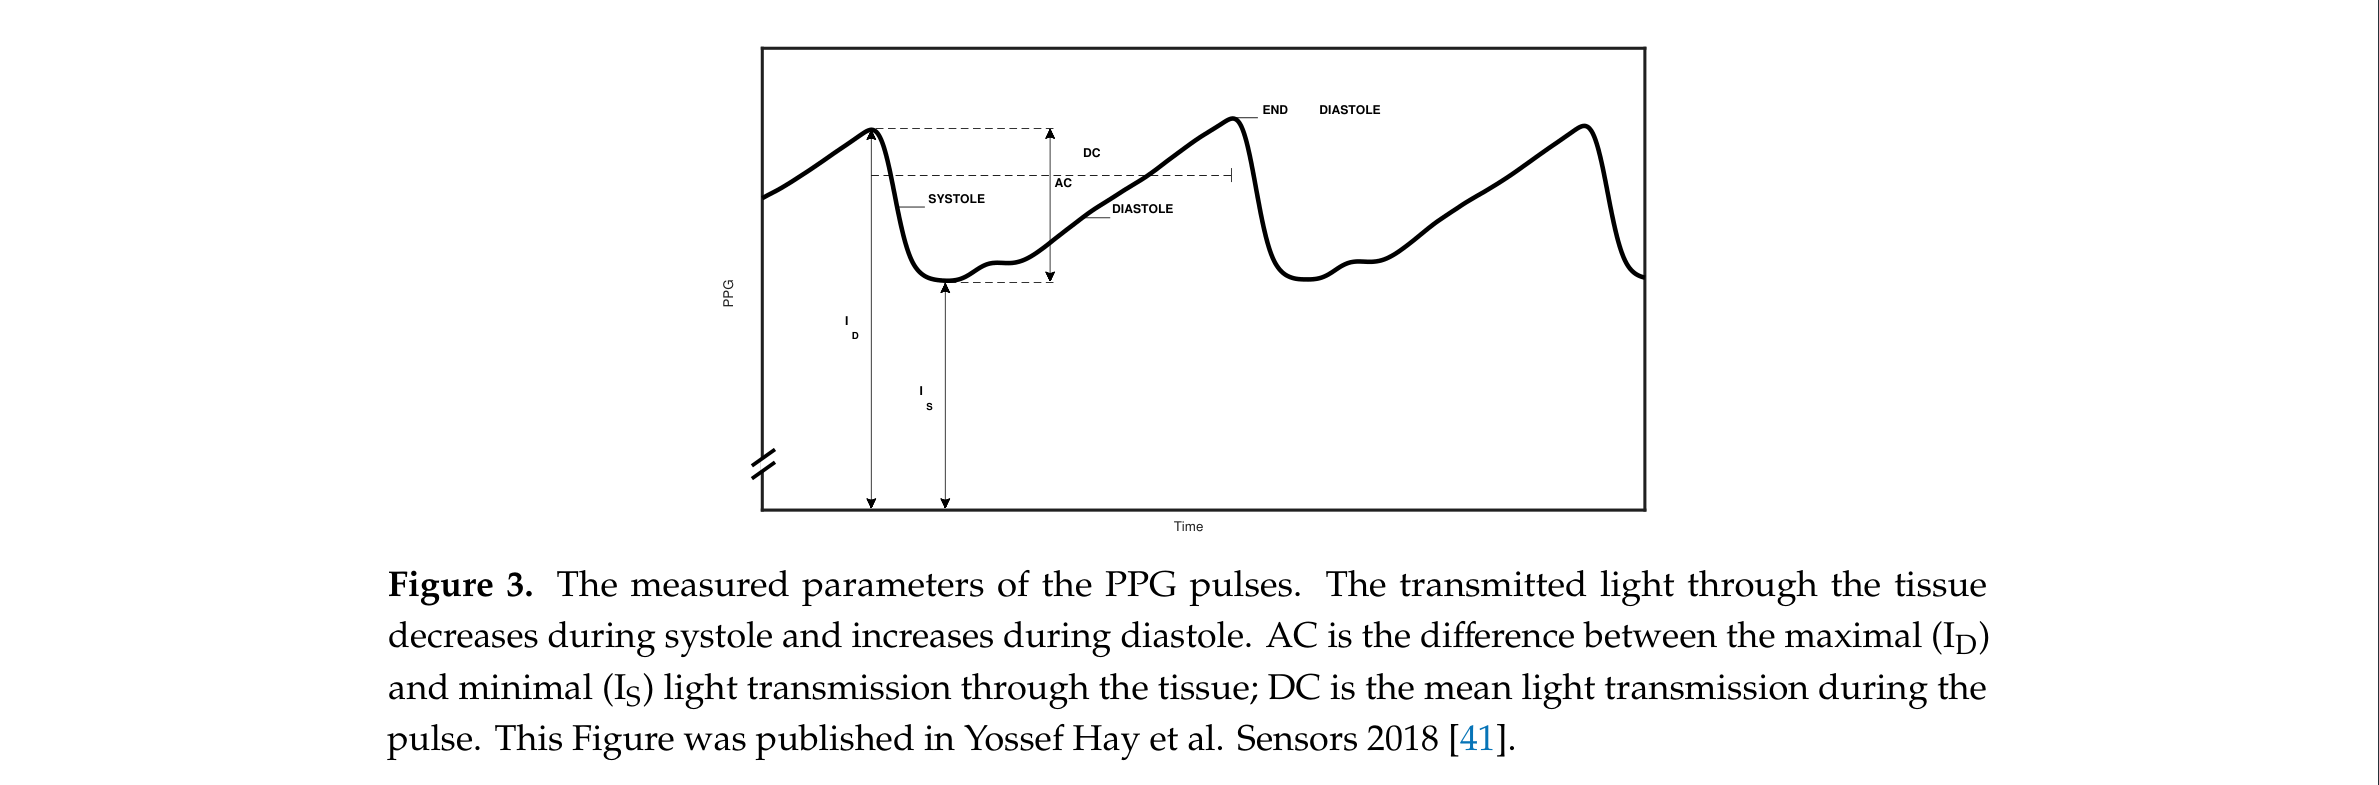

Intensiteten af lys gennem væv beskrives med følgende to ækvivalente ligninger
$$
I_t = I_0 \exp(-G-\varepsilon Cl) \tag{3.1} 
$$
eller:
$$
\ln \left(\frac{I_0}{I_t} \right) = G + \varepsilon Cl \tag{3.2} 
$$

Intensiteten ved Systole og Diastole kan beskrives via ligning 3.1, 3.2. $G_S$, $C_S$, $l_S$ er parameter værdier for systolen, $G_D$, $C_D$, $l_D$ er parameter værdier for diastolen, man starter med at skrive udtryk op for intensiteten for diastol og systol:  
$$
I_D = I_0 \exp (-G_D - \varepsilon C_D l_D)
$$

$$
I_S = I_0 \exp (-G_S - \varepsilon C_S l_S)
$$
Forholdet er:
$$
\frac{I_S}{I_D} = \frac{I_0 \exp (-G_S - \varepsilon C_S l_S)}{I_0 \exp (-G_D - \varepsilon C_D l_D)}
$$
$I_0$ går ud:
$$
\frac{I_S}{I_D} = \frac{\exp (-G_S - \varepsilon C_S l_S)}{\exp (-G_D - \varepsilon C_D l_D)}
$$  
Eksponential regneregel bruges $\frac{\exp(a)}{\exp(b)} = \exp(a-b)$:  
$$
\frac{I_S}{I_D} = \exp((-G_S - \varepsilon C_S l_S) - (-G_D - \varepsilon C_D l_D))
$$  
Simplificerer:
$$
\frac{I_S}{I_D} = \exp(-G_S - \varepsilon C_S l_S + G_D + \varepsilon C_D l_D)
$$
Igen:
$$
\frac{I_S}{I_D} = \exp((G_D - G_S) + \varepsilon (C_Dl_D - C_S l_S))
$$
Eksponentielle regneregel $\exp(a+b) = \exp(a) + \exp(b)$ bruges:
$$
\frac{I_S}{I_D} = \exp(G_D - G_S) \cdot \exp(\varepsilon(C_Dl_D - C_Sl_S)) \tag{7.1} 
$$
Og elimineres eksponentialerne:
$$
\ln \left(\frac{I_S}{I_D} \right) = G_D-G_S + \varepsilon C_Dl_D - \varepsilon C_Sl_S \tag{7.2} 
$$